## Ejemplo

Una persona se toma un antiácido cada vez que el ph de su estómago alcanza un mínimo cercano a ph = 2.
Se monitoriza su pH y se obtiene la figura 1. Se mide el ph con respecto al tiempo y se pretende estudiar el efecto del antiácido aislándolo de la fluctuación natural del ph del estómago. (para simplificarlo, en este ejemplo se supone que ambos son independientes entre sí, es decir, tomar un antiácido no altera la flucutación natural del ph del estómago).

## Figura 1

La figura 1 es la obtenida como resultado del código que aparece a continuación:

-0.49726094768413676


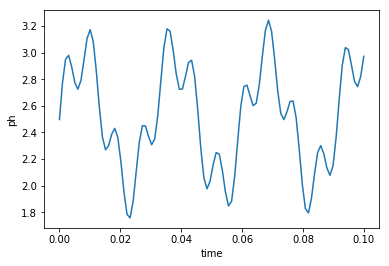

In [63]:
import numpy as np

import matplotlib.pyplot as plotter

from scipy.fftpack import fft


# Number of sample points
N = 100

# sample spacing. Es el tiempo que transcurre desde que se toma una muestra hasta que se toma la siguiente.
T = 1.0 / 1000.0 

#frequency 
F1 = 120
F2 = 33

y1 = 0.25*(np.sin(F1 * 2*np.pi*x)) #esto es el vector que contiene la fluctuación normal del ph del estómago
y2 = 0.5*(np.sin(F2 * 2*np.pi*x)) #este vector conteiene la fluctuación debido al efecto del antiácido
print(min(y2)) #-0.49726094768413676 es el valor mínimo que alcanza y2
y2 = y2 + 0.49726094768413676 #sumando 0.49726094768413676, y2 es siempre mayor que 0. Esto se hace porque el antiácido siempre aumenta el ph, no lo hace disminuir

#y1 e y2 normalmente no se conocerían de antemano. En este caso se utilizan para obtener y_observada, pero en la vida real obtendrías y_observada como resultado del experimento sin tener ni idea de la existencia de y1 e y2


y_observada = 2 + y1 + y2 #ph medido. Se toma 2 como base, se suma la fluctuación natural y la fluctuación causada por los antiácidos


x = np.linspace(0.0, N*T, N) #esto te da el tiempo en un vector. Hay N elementos equidistantes entre 0 (tiempo inicial) y N*T (tiempo final)



plotter.plot(x, y_observada) #se representa amplitud de la señal frente al tiempo
plotter.xlabel('time')
plotter.ylabel('ph')
plotter.axis('tight')
# plt.grid()
plotter.show() #esto hace que el gráfico aparezca en pantalla




En la figura 1 no se aprecia claramente el efecto del antiácido debido a la superposición con la fluctuación natural. Para remediarlo, se emplea la transformada de Fourier.

## Figura 2

A continuación se usa la transformada de Fourier para descomponer y_observada en sus componentes y así poder estudiar mejor los patrones:

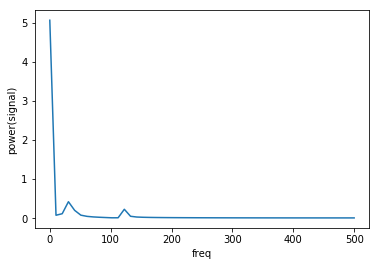

In [64]:
def fourier (y, T, N):
    yf = fft(y) 
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    return (xf, yf)
    
(x_f, y_f) = fourier (y_observada, T, N)   
    
def plot_fourier (xf, yf):    
    plotter.plot(xf, 2.0/N * np.abs(yf[0:N//2])) 
    plotter.xlabel('freq')
    plotter.ylabel('power(signal)')
    
plot_fourier (x_f, y_f)

## Conclusiones

En la figura 2 hay un pico fuerte con una frecuencia de 33 y uno más débil con una frecuencia de 120. Ahora hay que determinar cuál pertenece a la fluctuación debida a los antiácidos y cuál es la fluctuación natural (recuerda que y1 e y2 no se conocerían en un experimento real).

En este experimento en realidad sí se conocería de antemano la frecuencia correspondiente a los antiácidos ya que se sabe cada cuánto tiempo se administran, pero vamos a suponer que no conocemos el dato.

Sin embargo, sí se sabe que el antiácido produce un efecto mayor que la fluctuación natural pero con menor frecuencia. Así, se puede determinar que el pico de la izquierda se corresponde con los antiácidos y el de la derecha, con la fluctuación natural.

Así, se han podido separar ambos efectos, hallando su frecuencia e intensidad.